<a href="https://colab.research.google.com/github/TomerikoDS/Exploring/blob/main/generate_synthetic_data_for_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Read the data frame
df = pd.read_csv('/content/Bank_Churn_Dataset.csv', delimiter=',')
df.shape

(10000, 14)

In [34]:
df_train['Exited'].value_counts()

0    6353
1    1647
Name: Exited, dtype: int64

In [35]:
6353-1647

4706

In [3]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

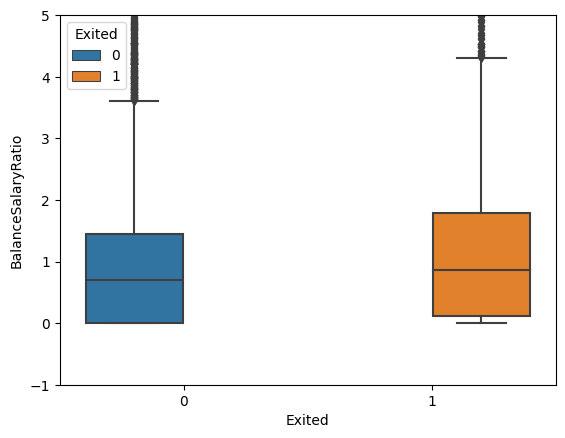

In [4]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
df_test['BalanceSalaryRatio'] = df_test.Balance/df_test.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

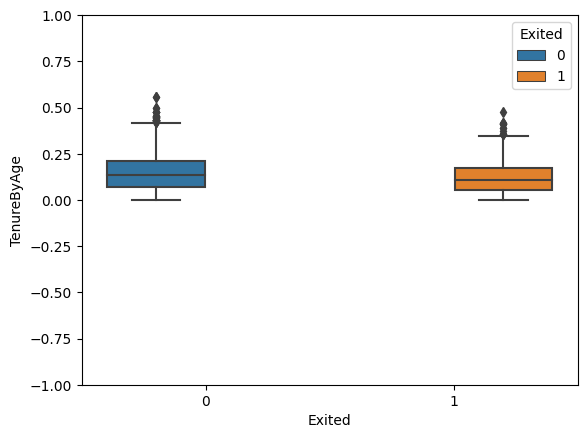

In [5]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
df_test['TenureByAge'] = df_test.Tenure/(df_test.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [6]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)
df_test['CreditScoreGivenAge'] = df_test.CreditScore/(df_test.Age)
df_train.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,8160,15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,6333,15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,8896,15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,5352,15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,4315,15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [7]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_test = df_test[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [8]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_test.loc[df_test.HasCrCard == 0, 'HasCrCard'] = -1
df_test.loc[df_test.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [9]:
np.object = object
np.str = str

# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
for i in lst:
    if (df_test[i].dtype == np.str or df_test[i].dtype == np.object):
        for j in df_test[i].unique():
            df_test[i+'_'+j] = np.where(df_test[i] == j,1,-1)
        remove.append(i)
df_test = df_test.drop(remove, axis=1)
df_train.head()

<ipython-input-9-090758556b68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
<ipython-input-9-090758556b68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
<ipython-input-9-090758556b68>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [10]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
minVec = df_test[continuous_vars].min().copy()
maxVec = df_test[continuous_vars].max().copy()
df_test[continuous_vars] = (df_test[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [11]:
# Fit Extreme Gradient Boost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

[18:54:49] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.65      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res,y_res)

[18:54:50] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      6353
           1       0.62      0.73      0.67      1647

    accuracy                           0.85      8000
   macro avg       0.77      0.81      0.79      8000
weighted avg       0.86      0.85      0.86      8000



In [15]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_res1, y_res1 = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res1,y_res1)

[18:54:51] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6353
           1       0.61      0.72      0.66      1647

    accuracy                           0.85      8000
   macro avg       0.77      0.80      0.78      8000
weighted avg       0.86      0.85      0.85      8000



In [17]:
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res2, y_res2 = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res2,y_res2)

[18:54:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6353
           1       0.64      0.72      0.68      1647

    accuracy                           0.86      8000
   macro avg       0.78      0.81      0.79      8000
weighted avg       0.87      0.86      0.86      8000



In [19]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res3, y_res3 = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res3,y_res3)

[18:55:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      6353
           1       0.59      0.72      0.64      1647

    accuracy                           0.84      8000
   macro avg       0.75      0.79      0.77      8000
weighted avg       0.85      0.84      0.84      8000



In [21]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)
X_res4, y_res4 = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res4,y_res4)

[18:55:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6353
           1       0.59      0.83      0.69      1647

    accuracy                           0.85      8000
   macro avg       0.77      0.84      0.80      8000
weighted avg       0.88      0.85      0.86      8000



In [23]:
from imblearn.over_sampling import SMOTEN
sm = SMOTEN(random_state=42)
X_res5, y_res5 = sm.fit_resample(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)
XGB.fit(X_res5,y_res5)

[18:55:17] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=1,
              monotone_constraints=None, n_estimators=20, n_jobs=1,
              nthread=None, num_parallel_tree=None, predictor=None, ...)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6353
           1       0.76      0.55      0.64      1647

    accuracy                           0.87      8000
   macro avg       0.83      0.75      0.78      8000
weighted avg       0.87      0.87      0.86      8000



In [25]:
# !pip install tabgan

In [26]:
# from tabgan.sampler import OriginalGenerator, GANGenerator

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [30]:
X_train = df_train.loc[:, df_train.columns != 'Exited']
y_train = df_train.Exited

array([0, 1])

In [32]:
np.array(df_train[y_train ==1])

array([[ 1.        ,  0.654     ,  0.13513514, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.        ,  0.358     ,  0.60810811, ..., -1.        ,
        -1.        ,  1.        ],
       [ 1.        ,  0.57      ,  0.47297297, ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [ 1.        ,  0.712     ,  0.16216216, ..., -1.        ,
        -1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.36486486, ...,  1.        ,
         1.        , -1.        ],
       [ 1.        ,  0.678     ,  0.13513514, ..., -1.        ,
         1.        , -1.        ]])

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

minority_data = np.array(df_train[y_train ==1])
minority_data.shape

(1647, 17)

In [29]:


# Define the GAN generator model
generator = Sequential()
generator.add(Dense(10, activation='relu', input_shape=(1,)))
generator.add(Dense(10, activation='relu'))
generator.add(Dense(1, activation='linear'))

# Define the GAN discriminator model
discriminator = Sequential()
discriminator.add(Dense(10, activation='relu', input_shape=(1,)))
discriminator.add(Dense(10, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the GAN discriminator model
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Combine the generator and discriminator into a GAN
gan = Sequential([generator, discriminator])

# Compile the GAN model
gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Function to train the GAN model
def train_gan(X_train, epochs=100, batch_size=32):
    for epoch in range(epochs):
        # Generate synthetic samples using the generator
        synthetic_samples = generator.predict(X_train)

        # Create a combined dataset of real and synthetic samples
        X_combined = np.concatenate((X_train, synthetic_samples))
        y_combined = np.concatenate((np.ones(X_train.shape[0]), np.zeros(X_train.shape[0])))

        # Shuffle the combined dataset
        indices = np.arange(X_combined.shape[0])
        np.random.shuffle(indices)
        X_combined = X_combined[indices]
        y_combined = y_combined[indices]

        # Train the discriminator on the combined dataset
        discriminator.train_on_batch(X_combined, y_combined)

        # Train the generator to fool the discriminator
        gan.train_on_batch(X_train, np.ones(X_train.shape[0]))

# Train the GAN model
train_gan(minority_data, epochs=1000)

# Generate synthetic samples for the underrepresented class
num_generated_samples = 4706
generated_samples = generator.predict(np.random.normal(30, 5, (num_generated_samples, 17)))

# Plot the original and generated samples
plt.scatter(minority_data, np.zeros_like(minority_data), color='blue', label='Original')
plt.scatter(generated_samples, np.ones_like(generated_samples), color='red', label='Generated')
plt.legend()
plt.show()


52/52 [==============================] - 0s 1ms/step


ValueError: ignored

In [ ]:
# sm = GANGenerator()
# X_res6, y_res6 = OriginalGenerator().generate_data_pipe(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited, df_test.loc[:, df_test.columns != 'Exited'], )
# X_res6, y_res6 = sm.generate_data_pipe(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited, df_test.loc[:, df_test.columns != 'Exited'], )
# XGB.fit(X_res6, y_res6)

In [ ]:
# a!pip install ctgan

In [ ]:
# from ctgan import CTGAN

# ctgan = CTGAN(epochs=10)
# ctgan.fit(df_train)

# # Create synthetic data
# synthetic_data = ctgan.sample(1000)



In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))